In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import missingno as mns

import warnings
warnings.filterwarnings('ignore')

In [2]:
state_data = pd.read_csv('./Data/covid19indiaorg/states.csv')
state_data.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [3]:
st_copy = state_data.copy()
st_copy.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [4]:
st_copy.shape

(10491, 7)

In [5]:
st_copy.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
10486,2021-01-01,Tripura,33261,32728,382,23,580269.0
10487,2021-01-01,India,10286790,9882403,149021,2857,172049574.0
10488,2021-01-01,Uttar Pradesh,584966,562459,8352,0,23943169.0
10489,2021-01-01,Uttarakhand,90920,83506,1509,1186,1777371.0
10490,2021-01-01,West Bengal,552063,530366,9712,0,7110430.0


In [6]:
st_copy.isnull().sum()

Date           0
State          0
Confirmed      0
Recovered      0
Deceased       0
Other          0
Tested       728
dtype: int64

In [7]:
# We create a new column - 'active'
st_copy['Active'] = st_copy['Confirmed'] - (st_copy['Recovered'] + st_copy['Deceased'] + st_copy['Other'])
st_copy.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested,Active
0,2020-01-30,Kerala,1,0,0,0,NaN,1
1,2020-01-30,India,1,0,0,0,NaN,1
2,2020-02-02,Kerala,2,0,0,0,NaN,2
3,2020-02-02,India,2,0,0,0,NaN,2
4,2020-02-03,Kerala,3,0,0,0,NaN,3


In [8]:
# Rename all columns
st_copy.columns = ['date', 'state', 'total_confirmed', 'total_recovered', 'total_deceased', 'other', 'tested', 'active']
st_copy.head()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,active
0,2020-01-30,Kerala,1,0,0,0,NaN,1
1,2020-01-30,India,1,0,0,0,NaN,1
2,2020-02-02,Kerala,2,0,0,0,NaN,2
3,2020-02-02,India,2,0,0,0,NaN,2
4,2020-02-03,Kerala,3,0,0,0,NaN,3


In [9]:
# TO-DO: Create three new columns - confirmed_daily, recovered_daily, deceased_daily
# The three values are computed by deducting corresponding value of a row from the previous row
# Let's add the three columns as blank for now
st_copy['daily_confirmed'] = 0

In [10]:
st_copy['daily_recovered'] = 0
st_copy['daily_deceased'] = 0

In [11]:
st_copy.head()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,active,daily_confirmed,daily_recovered,daily_deceased
0,2020-01-30,Kerala,1,0,0,0,NaN,1,0,0,0
1,2020-01-30,India,1,0,0,0,NaN,1,0,0,0
2,2020-02-02,Kerala,2,0,0,0,NaN,2,0,0,0
3,2020-02-02,India,2,0,0,0,NaN,2,0,0,0
4,2020-02-03,Kerala,3,0,0,0,NaN,3,0,0,0


In [12]:
st_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10491 entries, 0 to 10490
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             10491 non-null  object 
 1   state            10491 non-null  object 
 2   total_confirmed  10491 non-null  int64  
 3   total_recovered  10491 non-null  int64  
 4   total_deceased   10491 non-null  int64  
 5   other            10491 non-null  int64  
 6   tested           9763 non-null   float64
 7   active           10491 non-null  int64  
 8   daily_confirmed  10491 non-null  int64  
 9   daily_recovered  10491 non-null  int64  
 10  daily_deceased   10491 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 901.7+ KB


In [13]:
st_copy.shape

(10491, 11)

In [14]:
# Since the number of rows are greater than 1000, we might have to create smaller datasets of selected states 
# and then compute values for the three new columns
# Let's start with India

In [15]:
#df_india['daily_confirmed'] = df_india['confirmed'] - df_india['confirmed'].shift(1)

In [16]:
df_ind = st_copy[(st_copy['state'] == 'India')]
df_ind.tail()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,active,daily_confirmed,daily_recovered,daily_deceased
10343,2020-12-28,India,10224797,9806767,148190,2823,169802049.0,267017,0,0,0
10379,2020-12-29,India,10245339,9833356,148475,2834,170922330.0,260674,0,0,0
10415,2020-12-30,India,10267284,9859763,148774,2849,172049574.0,255898,0,0,0
10451,2020-12-31,India,10286329,9881786,149018,2857,172049574.0,252668,0,0,0
10487,2021-01-01,India,10286790,9882403,149021,2857,172049574.0,252509,0,0,0


In [17]:
# Let's compute the daily confirmed for India and store values in the column
df_ind['daily_confirmed'] = df_ind['total_confirmed'] - df_ind['total_confirmed'].shift(1)
df_ind.tail()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,active,daily_confirmed,daily_recovered,daily_deceased
10343,2020-12-28,India,10224797,9806767,148190,2823,169802049.0,267017,16072.0,0,0
10379,2020-12-29,India,10245339,9833356,148475,2834,170922330.0,260674,20542.0,0,0
10415,2020-12-30,India,10267284,9859763,148774,2849,172049574.0,255898,21945.0,0,0
10451,2020-12-31,India,10286329,9881786,149018,2857,172049574.0,252668,19045.0,0,0
10487,2021-01-01,India,10286790,9882403,149021,2857,172049574.0,252509,461.0,0,0


In [18]:
# Let's compute daily recovered and store values in the column
df_ind['daily_recovered'] = df_ind['total_recovered'] - df_ind['total_recovered'].shift(1)
df_ind.tail()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,active,daily_confirmed,daily_recovered,daily_deceased
10343,2020-12-28,India,10224797,9806767,148190,2823,169802049.0,267017,16072.0,24822.0,0
10379,2020-12-29,India,10245339,9833356,148475,2834,170922330.0,260674,20542.0,26589.0,0
10415,2020-12-30,India,10267284,9859763,148774,2849,172049574.0,255898,21945.0,26407.0,0
10451,2020-12-31,India,10286329,9881786,149018,2857,172049574.0,252668,19045.0,22023.0,0
10487,2021-01-01,India,10286790,9882403,149021,2857,172049574.0,252509,461.0,617.0,0


In [19]:
# Let's compute daily deceased
df_ind['daily_deceased'] = df_ind['total_deceased'] - df_ind['total_deceased'].shift(1)
df_ind.tail()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,active,daily_confirmed,daily_recovered,daily_deceased
10343,2020-12-28,India,10224797,9806767,148190,2823,169802049.0,267017,16072.0,24822.0,250.0
10379,2020-12-29,India,10245339,9833356,148475,2834,170922330.0,260674,20542.0,26589.0,285.0
10415,2020-12-30,India,10267284,9859763,148774,2849,172049574.0,255898,21945.0,26407.0,299.0
10451,2020-12-31,India,10286329,9881786,149018,2857,172049574.0,252668,19045.0,22023.0,244.0
10487,2021-01-01,India,10286790,9882403,149021,2857,172049574.0,252509,461.0,617.0,3.0


In [20]:
# Drop the 'other' column
df_ind = df_ind.drop(['other'], axis = 1)
df_ind.tail()

,date,state,total_confirmed,total_recovered,total_deceased,tested,active,daily_confirmed,daily_recovered,daily_deceased
10343,2020-12-28,India,10224797,9806767,148190,169802049.0,267017,16072.0,24822.0,250.0
10379,2020-12-29,India,10245339,9833356,148475,170922330.0,260674,20542.0,26589.0,285.0
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,255898,21945.0,26407.0,299.0
10451,2020-12-31,India,10286329,9881786,149018,172049574.0,252668,19045.0,22023.0,244.0
10487,2021-01-01,India,10286790,9882403,149021,172049574.0,252509,461.0,617.0,3.0


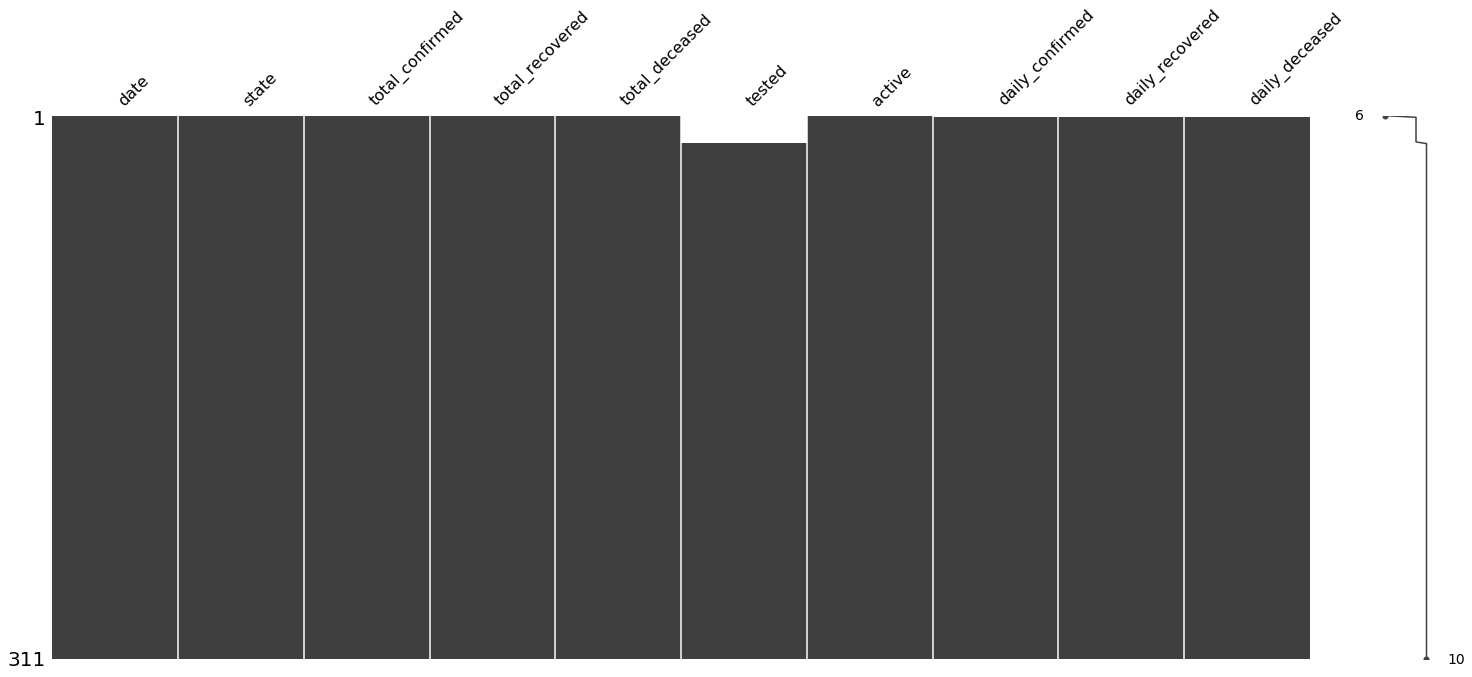

In [21]:
mns.matrix(df_ind)

In [22]:
df_ind.isnull().sum()

date                0
state               0
total_confirmed     0
total_recovered     0
total_deceased      0
tested             16
active              0
daily_confirmed     1
daily_recovered     1
daily_deceased      1
dtype: int64

In [23]:
df_ind.head(20)

,date,state,total_confirmed,total_recovered,total_deceased,tested,active,daily_confirmed,daily_recovered,daily_deceased
1,2020-01-30,India,1,0,0,NaN,1,NaN,NaN,NaN
3,2020-02-02,India,2,0,0,NaN,2,1.0,0.0,0.0
5,2020-02-03,India,3,0,0,NaN,3,1.0,0.0,0.0
7,2020-02-14,India,3,3,0,NaN,0,0.0,3.0,0.0
10,2020-02-20,India,3,3,0,NaN,0,0.0,0.0,0.0
15,2020-03-02,India,5,3,0,NaN,2,2.0,0.0,0.0
21,2020-03-03,India,6,3,0,NaN,3,1.0,0.0,0.0
28,2020-03-04,India,28,3,0,NaN,25,22.0,0.0,0.0
36,2020-03-05,India,30,3,0,NaN,27,2.0,0.0,0.0
44,2020-03-06,India,31,3,0,NaN,28,1.0,0.0,0.0


In [24]:
# Remove all rows that have null values - this will be the first 16
df_ind = df_ind.dropna()
df_ind.head(20)

,date,state,total_confirmed,total_recovered,total_deceased,tested,active,daily_confirmed,daily_recovered,daily_deceased
131,2020-03-13,India,91,3,1,6500.0,87,10.0,0.0,1.0
146,2020-03-14,India,102,3,1,6500.0,95,11.0,0.0,0.0
161,2020-03-15,India,112,3,1,6500.0,105,10.0,0.0,0.0
178,2020-03-16,India,126,3,1,6500.0,119,14.0,0.0,0.0
196,2020-03-17,India,146,3,1,6500.0,139,20.0,0.0,0.0
215,2020-03-18,India,171,3,1,13125.0,164,25.0,0.0,0.0
237,2020-03-19,India,198,3,1,14175.0,191,27.0,0.0,0.0
260,2020-03-20,India,256,4,1,15404.0,248,58.0,1.0,0.0
283,2020-03-21,India,334,4,1,16911.0,326,78.0,0.0,0.0
307,2020-03-22,India,403,4,1,18127.0,395,69.0,0.0,0.0


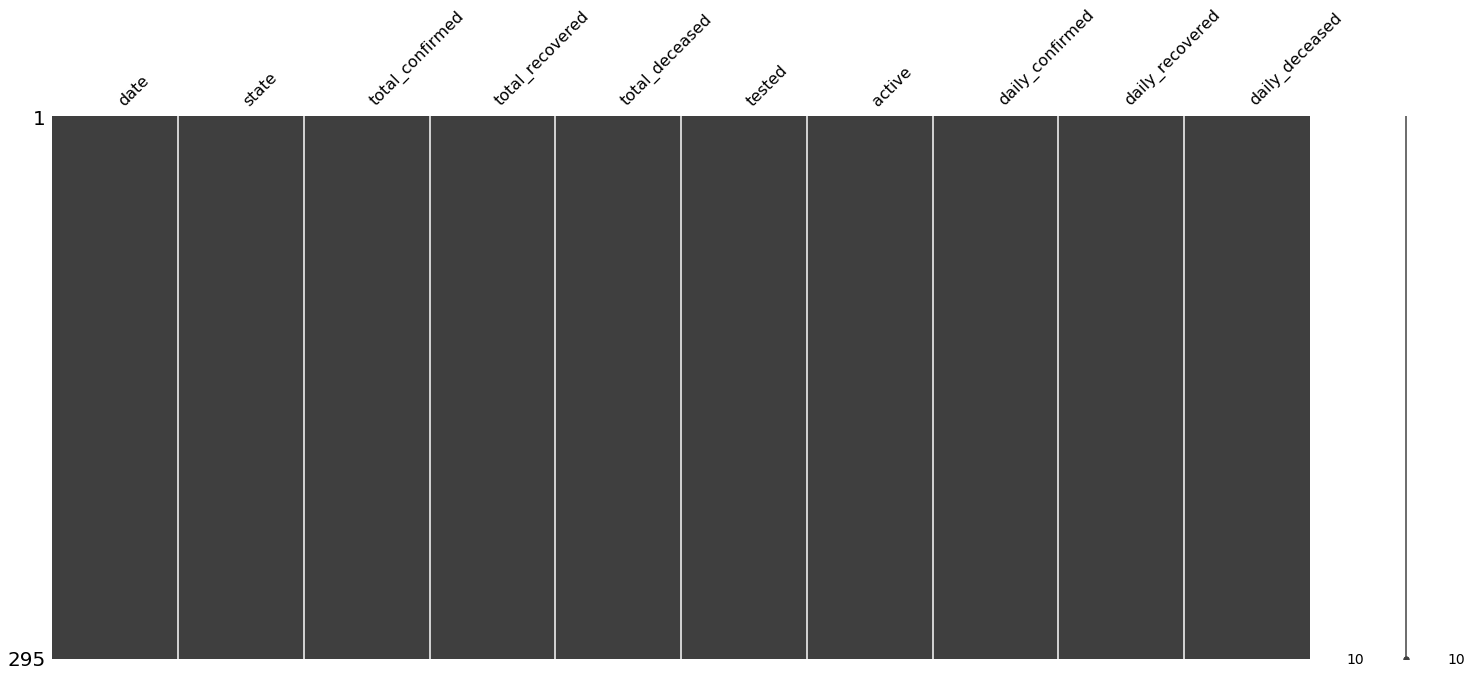

In [25]:
mns.matrix(df_ind)

In [26]:
df_ind.shape

(295, 10)